In [1]:
import numpy as np
import pandas as pd
import os
import os.path as path
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Embedding, LSTM, GRU, Input, SpatialDropout1D,Flatten, Dropout,GlobalMaxPooling1D,Conv1D,MaxPooling1D
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer, one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.initializers import RandomNormal
from tensorflow.keras.regularizers import l2
import re
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score, confusion_matrix,balanced_accuracy_score, make_scorer, precision_recall_fscore_support
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from google.colab import files

Using TensorFlow backend.


In [2]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
from google.colab import drive
drive.mount('drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at drive


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving GTNT_training.csv to GTNT_training.csv


In [ ]:
df = pd.read_csv("GTNT_training.csv", delimiter=',', header=None,names=['id', 't','label'])

In [ ]:
# Prepare predicted labels
df = df.iloc[1:]
Y = df.label
Y_series=pd.Series(Y,dtype='category')
Y = Y_series.cat.codes
y_prep = to_categorical(Y)
print(y_prep.shape)
print(Y_series)

(10000, 2)
1        0.0
2        0.0
3        0.0
4        0.0
5        0.0
        ... 
9996     1.0
9997     1.0
9998     1.0
9999     1.0
10000    1.0
Name: label, Length: 10000, dtype: category
Categories (2, object): [0.0, 1.0]


In [ ]:
# Create and fit tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df.t)
vocab_size = len(tokenizer.word_index) + 1
word_index = tokenizer.word_index
prep_data = tokenizer.texts_to_sequences(df.t)

In [ ]:
prep_data = pad_sequences(prep_data, maxlen=200,padding="post")

In [ ]:
print(len(prep_data))
print(len(Y))

10000
10000


In [ ]:
# prepare train, test and validation data
X_train, X_test, y_train, y_test = train_test_split(prep_data, y_prep, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(prep_data, y_prep, test_size=0.25, random_state=42)

In [ ]:
def get_model(embed,dropout,neurons):
    model = Sequential()
    model.add(Embedding(vocab_size, output_dim=embed, input_length=200))
    model.add(Dropout(dropout))
    model.add(LSTM(neurons,activation='tanh',return_sequences=True,recurrent_regularizer=l2(0.01)))
    model.add(GlobalMaxPooling1D())
    model.add(Dense(2, activation='sigmoid'))
    optimizer=Adam(learning_rate=0.001)
    model.compile(loss='binary_crossentropy', 
                  optimizer=optimizer,
                  metrics=['accuracy'])
    return model


In [ ]:
embedding1 = 128
embedding2 = 256
embedding3 = 512
dropout1 = 0.3
dropout2 = 0.5
dropout3 = 0.7
neuron1 = 32
neuron2 = 64
neuron3 = 128

In [ ]:
model1 = get_model(embedding2, dropout2, neuron1)
model2 = get_model(embedding2, dropout2, neuron2)
model3 = get_model(embedding2, dropout2, neuron3)

In [ ]:
history1 = model1.fit(X_train, y_train, epochs=20,batch_size=32,validation_data=(X_val,y_val))
history2 = model2.fit(X_train, y_train, epochs=20,batch_size=32,validation_data=(X_val,y_val))
history3 = model3.fit(X_train, y_train, epochs=20,batch_size=32,validation_data=(X_val,y_val))

Epoch 1/20
235/235 [==============================] - 9s 38ms/step - loss: 0.5656 - accuracy: 0.7772 - val_loss: 0.2855 - val_accuracy: 0.9044
Epoch 2/20
235/235 [==============================] - 8s 35ms/step - loss: 0.2226 - accuracy: 0.9229 - val_loss: 0.2381 - val_accuracy: 0.9128
Epoch 3/20
235/235 [==============================] - 8s 36ms/step - loss: 0.1389 - accuracy: 0.9529 - val_loss: 0.2296 - val_accuracy: 0.9144
Epoch 4/20
235/235 [==============================] - 8s 35ms/step - loss: 0.0913 - accuracy: 0.9727 - val_loss: 0.2638 - val_accuracy: 0.9092
Epoch 5/20
235/235 [==============================] - 9s 37ms/step - loss: 0.0645 - accuracy: 0.9820 - val_loss: 0.2874 - val_accuracy: 0.9016
Epoch 6/20
235/235 [==============================] - 8s 36ms/step - loss: 0.0524 - accuracy: 0.9860 - val_loss: 0.2908 - val_accuracy: 0.9040
Epoch 7/20
235/235 [==============================] - 8s 35ms/step - loss: 0.0432 - accuracy: 0.9880 - val_loss: 0.3428 - val_accuracy: 0.8960

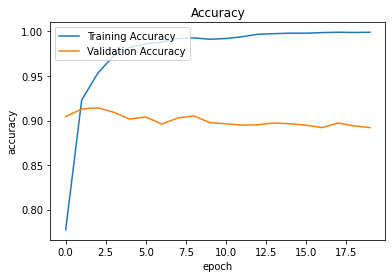

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

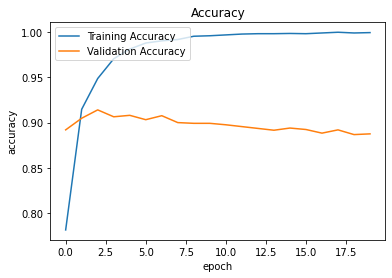

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

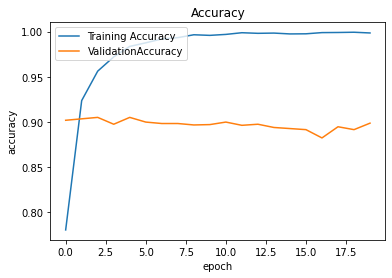

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Insert lists of accuracy obtained on the validation set
#plt.plot('acc', marker='o')
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
# Add extra descriptions to plot
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper left')
# Display the plot
plt.savefig('m1acc.png', dpi=600)
plt.show()
files.download("m1acc.png") 


#plt.plot('acc', marker='o')
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
# Add extra descriptions to plot
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper left')
# Display the plot
plt.savefig('m2acc.png', dpi=600)
plt.show()
files.download("m2acc.png") 


#plt.plot('acc', marker='o')
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
# Add extra descriptions to plot
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Training Accuracy', 'ValidationAccuracy'], loc='upper left')
# Display the plot
plt.savefig('m3acc.png', dpi=600)
plt.show()
files.download("m3acc.png") 

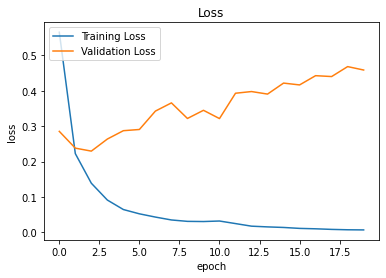

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

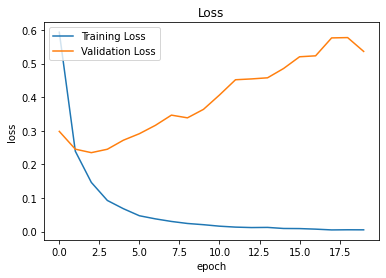

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

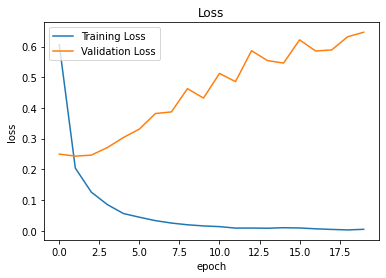

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
# Add extra descriptions to plot
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training Loss','Validation Loss'], loc='upper left')
# Display the plot
plt.savefig('m1loss.png', dpi=600)
plt.show()
files.download("m1loss.png") 


plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
# Add extra descriptions to plot
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training Loss','Validation Loss'], loc='upper left')
# Display the plot
plt.savefig('m2loss.png', dpi=600)
plt.show()
files.download("m2loss.png") 


plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
# Add extra descriptions to plot
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training Loss','Validation Loss'], loc='upper left')
# Display the plot
plt.savefig('m3loss.png', dpi=600)
plt.show()
files.download("m3loss.png") 

In [ ]:
loss1, accuracy1 = model1.evaluate(X_test,y_test, verbose=0)
print("Loss:\t{0}\nAccuracy:\t{1}".format(loss1, accuracy1))

loss2, accuracy2 = model2.evaluate(X_test,y_test, verbose=0)
print("Loss:\t{0}\nAccuracy:\t{1}".format(loss2, accuracy2))

loss3, accuracy3 = model3.evaluate(X_test,y_test, verbose=0)
print("Loss:\t{0}\nAccuracy:\t{1}".format(loss3, accuracy3))

Loss:	0.44397518038749695
Accuracy:	0.8930000066757202
Loss:	0.5209050178527832
Accuracy:	0.8899999856948853
Loss:	0.6432122588157654
Accuracy:	0.8999999761581421


Next session

In [ ]:
model4 = get_model(embedding1, dropout2, neuron1)
model5 = get_model(embedding2, dropout2, neuron1)
model6 = get_model(embedding3, dropout2, neuron1)

In [ ]:
history4 = model4.fit(X_train, y_train, epochs=20,batch_size=32,validation_data=(X_val,y_val))
history5 = model5.fit(X_train, y_train, epochs=20,batch_size=32,validation_data=(X_val,y_val))
history6 = model6.fit(X_train, y_train, epochs=20,batch_size=32,validation_data=(X_val,y_val))

Epoch 1/20
235/235 [==============================] - 6s 24ms/step - loss: 0.5805 - accuracy: 0.7619 - val_loss: 0.2988 - val_accuracy: 0.8920
Epoch 2/20
235/235 [==============================] - 5s 22ms/step - loss: 0.2290 - accuracy: 0.9205 - val_loss: 0.2281 - val_accuracy: 0.9132
Epoch 3/20
235/235 [==============================] - 5s 21ms/step - loss: 0.1465 - accuracy: 0.9519 - val_loss: 0.2326 - val_accuracy: 0.9116
Epoch 4/20
235/235 [==============================] - 5s 21ms/step - loss: 0.1062 - accuracy: 0.9671 - val_loss: 0.2399 - val_accuracy: 0.9132
Epoch 5/20
235/235 [==============================] - 5s 21ms/step - loss: 0.0868 - accuracy: 0.9772 - val_loss: 0.2540 - val_accuracy: 0.9092
Epoch 6/20
235/235 [==============================] - 5s 22ms/step - loss: 0.0646 - accuracy: 0.9808 - val_loss: 0.2604 - val_accuracy: 0.9072
Epoch 7/20
235/235 [==============================] - 5s 21ms/step - loss: 0.0546 - accuracy: 0.9861 - val_loss: 0.2960 - val_accuracy: 0.9052

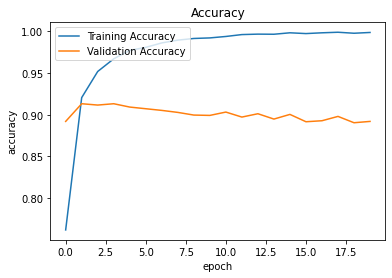

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

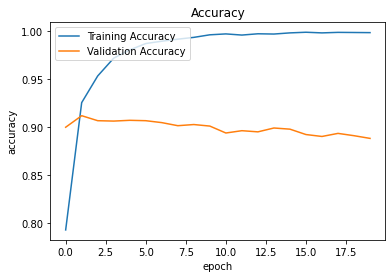

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

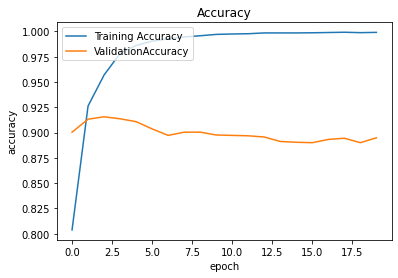

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Insert lists of accuracy obtained on the validation set
#plt.plot('acc', marker='o')
plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
# Add extra descriptions to plot
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper left')
# Display the plot
plt.savefig('m4acc.png', dpi=600)
plt.show()
files.download("m4acc.png") 


#plt.plot('acc', marker='o')
plt.plot(history5.history['accuracy'])
plt.plot(history5.history['val_accuracy'])
# Add extra descriptions to plot
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper left')
# Display the plot
plt.savefig('m5acc.png', dpi=600)
plt.show()
files.download("m5acc.png") 


#plt.plot('acc', marker='o')
plt.plot(history6.history['accuracy'])
plt.plot(history6.history['val_accuracy'])
# Add extra descriptions to plot
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Training Accuracy', 'ValidationAccuracy'], loc='upper left')
# Display the plot
plt.savefig('m6acc.png', dpi=600)
plt.show()
files.download("m6acc.png") 

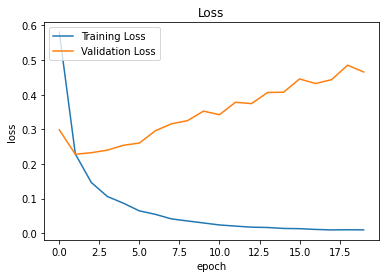

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

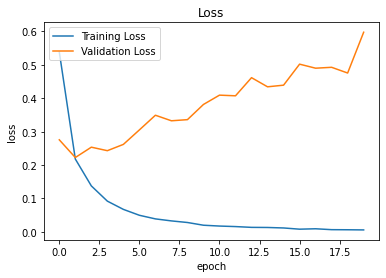

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

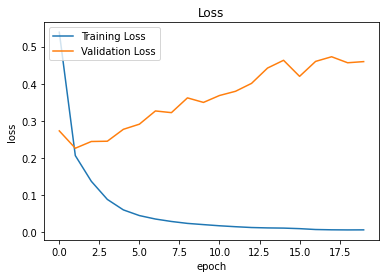

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
# Add extra descriptions to plot
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training Loss','Validation Loss'], loc='upper left')
# Display the plot
plt.savefig('m4loss.png', dpi=600)
plt.show()
files.download("m4loss.png") 


plt.plot(history5.history['loss'])
plt.plot(history5.history['val_loss'])
# Add extra descriptions to plot
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training Loss','Validation Loss'], loc='upper left')
# Display the plot
plt.savefig('m5loss.png', dpi=600)
plt.show()
files.download("m5loss.png") 


plt.plot(history6.history['loss'])
plt.plot(history6.history['val_loss'])
# Add extra descriptions to plot
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training Loss','Validation Loss'], loc='upper left')
# Display the plot
plt.savefig('m6loss.png', dpi=600)
plt.show()
files.download("m6loss.png") 

In [ ]:
loss4, accuracy4 = model4.evaluate(X_test,y_test, verbose=0)
print("Loss:\t{0}\nAccuracy:\t{1}".format(loss4, accuracy4))

loss5, accuracy5 = model5.evaluate(X_test,y_test, verbose=0)
print("Loss:\t{0}\nAccuracy:\t{1}".format(loss5, accuracy5))

loss6, accuracy6 = model6.evaluate(X_test,y_test, verbose=0)
print("Loss:\t{0}\nAccuracy:\t{1}".format(loss6, accuracy6))

Loss:	0.45860594511032104
Accuracy:	0.8949999809265137
Loss:	0.5834123492240906
Accuracy:	0.8934999704360962
Loss:	0.45548033714294434
Accuracy:	0.8974999785423279


Third sessions

In [ ]:
model7 = get_model(embedding1, dropout1, neuron1)
model8 = get_model(embedding1, dropout2, neuron1)
model9 = get_model(embedding1, dropout3, neuron1)

In [ ]:
history7 = model7.fit(X_train, y_train, epochs=20,batch_size=32,validation_data=(X_val,y_val))
history8 = model8.fit(X_train, y_train, epochs=20,batch_size=32,validation_data=(X_val,y_val))
history9 = model9.fit(X_train, y_train, epochs=20,batch_size=32,validation_data=(X_val,y_val))

Epoch 1/20
235/235 [==============================] - 6s 24ms/step - loss: 0.5874 - accuracy: 0.7813 - val_loss: 0.3043 - val_accuracy: 0.9000
Epoch 2/20
235/235 [==============================] - 5s 21ms/step - loss: 0.2325 - accuracy: 0.9228 - val_loss: 0.2325 - val_accuracy: 0.9152
Epoch 3/20
235/235 [==============================] - 5s 21ms/step - loss: 0.1406 - accuracy: 0.9555 - val_loss: 0.2386 - val_accuracy: 0.9136
Epoch 4/20
235/235 [==============================] - 5s 22ms/step - loss: 0.0942 - accuracy: 0.9705 - val_loss: 0.2430 - val_accuracy: 0.9148
Epoch 5/20
235/235 [==============================] - 5s 21ms/step - loss: 0.0663 - accuracy: 0.9815 - val_loss: 0.2787 - val_accuracy: 0.9044
Epoch 6/20
235/235 [==============================] - 5s 22ms/step - loss: 0.0486 - accuracy: 0.9875 - val_loss: 0.2899 - val_accuracy: 0.9008
Epoch 7/20
235/235 [==============================] - 5s 22ms/step - loss: 0.0428 - accuracy: 0.9884 - val_loss: 0.3026 - val_accuracy: 0.9028

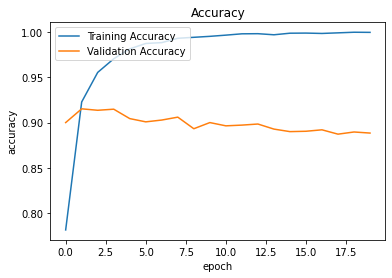

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

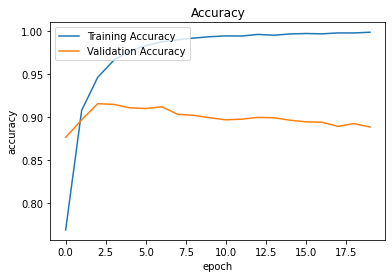

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

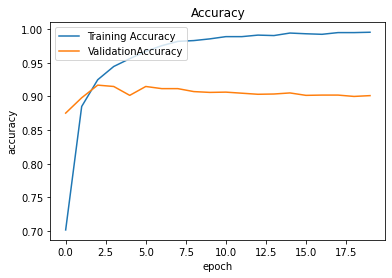

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Insert lists of accuracy obtained on the validation set
#plt.plot('acc', marker='o')
plt.plot(history7.history['accuracy'])
plt.plot(history7.history['val_accuracy'])
# Add extra descriptions to plot
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper left')
# Display the plot
plt.savefig('m7acc.png', dpi=600)
plt.show()
files.download("m7acc.png") 


#plt.plot('acc', marker='o')
plt.plot(history8.history['accuracy'])
plt.plot(history8.history['val_accuracy'])
# Add extra descriptions to plot
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper left')
# Display the plot
plt.savefig('m8acc.png', dpi=600)
plt.show()
files.download("m8acc.png") 


#plt.plot('acc', marker='o')
plt.plot(history9.history['accuracy'])
plt.plot(history9.history['val_accuracy'])
# Add extra descriptions to plot
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Training Accuracy', 'ValidationAccuracy'], loc='upper left')
# Display the plot
plt.savefig('m9acc.png', dpi=600)
plt.show()
files.download("m9acc.png") 

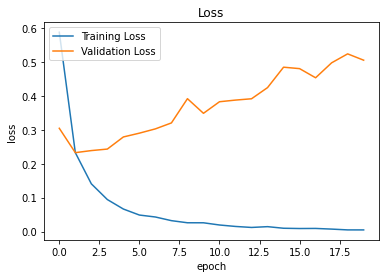

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

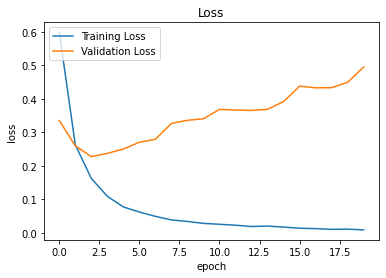

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

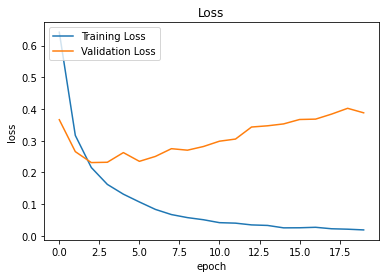

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
plt.plot(history7.history['loss'])
plt.plot(history7.history['val_loss'])
# Add extra descriptions to plot
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training Loss','Validation Loss'], loc='upper left')
# Display the plot
plt.savefig('m7loss.png', dpi=600)
plt.show()
files.download("m7loss.png") 


plt.plot(history8.history['loss'])
plt.plot(history8.history['val_loss'])
# Add extra descriptions to plot
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training Loss','Validation Loss'], loc='upper left')
# Display the plot
plt.savefig('m8loss.png', dpi=600)
plt.show()
files.download("m8loss.png") 


plt.plot(history9.history['loss'])
plt.plot(history9.history['val_loss'])
# Add extra descriptions to plot
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training Loss','Validation Loss'], loc='upper left')
# Display the plot
plt.savefig('m9loss.png', dpi=600)
plt.show()
files.download("m9loss.png") 

In [ ]:
loss7, accuracy7 = model7.evaluate(X_test, y_test, verbose=0)
print("Loss:\t{0}\nAccuracy:\t{1}".format(loss7, accuracy7))

loss8, accuracy8 = model8.evaluate(X_test, y_test, verbose=0)
print("Loss:\t{0}\nAccuracy:\t{1}".format(loss8, accuracy8))

loss9, accuracy9 = model9.evaluate(X_test, y_test, verbose=0)
print("Loss:\t{0}\nAccuracy:\t{1}".format(loss9, accuracy9))

Loss:	0.48194620013237
Accuracy:	0.8930000066757202
Loss:	0.478539377450943
Accuracy:	0.8920000195503235
Loss:	0.37989550828933716
Accuracy:	0.9010000228881836


FINAL ANALYSIS

In [3]:
from google.colab import files
uploaded = files.upload()

Saving GTNT.csv to GTNT.csv


In [4]:
df = pd.read_csv("GTNT.csv", delimiter=',', header=None,names=['id', 't','label'])

In [5]:
# Prepare predicted labels
df = df.iloc[1:]
Y = df.label
Y_series=pd.Series(Y,dtype='category')
Y = Y_series.cat.codes
y_prep = to_categorical(Y)
print(y_prep.shape)
print(Y_series)

(31103, 2)
1        0.0
2        0.0
3        0.0
4        0.0
5        0.0
        ... 
31099    1.0
31100    1.0
31101    1.0
31102    1.0
31103    1.0
Name: label, Length: 31103, dtype: category
Categories (2, object): [0.0, 1.0]


In [9]:
df 

,id,t,label
2,1.0,In the beginning God{After God the Hebrew has ...,0.0
3,2.0,Now the earth was formless and empty Darkness ...,0.0
4,3.0,God said Let there be light and there was light,0.0
5,4.0,God saw the light and saw that it was good God...,0.0
6,5.0,God called the light Day and the darkness he c...,0.0
...,...,...,...
31099,31098.0,The Spirit and the bride say Come! He who hear...,1.0
31100,31099.0,I testify to everyone who hears the words of t...,1.0
31101,31100.0,If anyone takes away from the words of the boo...,1.0
31102,31101.0,He who testifies these things says Yes I come ...,1.0


In [10]:
print(df.t.str.len().max())
print(df.t.str.len().min())
print(df.t.str.len().mean())

597
10
124.53822905279404


In [12]:
# Create and fit tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df.t)
vocab_size = len(tokenizer.word_index) + 1
word_index = tokenizer.word_index
prep_data = tokenizer.texts_to_sequences(df.t)

In [13]:
prep_data = pad_sequences(prep_data, maxlen=200,padding="post")

In [22]:
print(len(prep_data))
print(len(Y))

31102
31103


In [ ]:
# prepare train, test and validation data
X_train, X_test, y_train, y_test = train_test_split(prep_data, y_prep, test_size=0.2, random_state=42)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [ ]:
model_final = get_model(embedding1,dropout3,neuron1)

In [ ]:
class_weight = dict()
class_weight[0] = 1	#  GT
class_weight[1] = 3	# NT

history_final = model_final.fit(X_train, y_train, epochs=20,batch_size=32,validation_data=(X_val,y_val),class_weight=class_weight)

Epoch 1/20
584/584 [==============================] - 17s 30ms/step - loss: 0.6421 - accuracy: 0.7933 - val_loss: 0.2249 - val_accuracy: 0.9156
Epoch 2/20
584/584 [==============================] - 17s 29ms/step - loss: 0.3012 - accuracy: 0.9246 - val_loss: 0.1843 - val_accuracy: 0.9314
Epoch 3/20
584/584 [==============================] - 17s 28ms/step - loss: 0.2251 - accuracy: 0.9452 - val_loss: 0.1713 - val_accuracy: 0.9375
Epoch 4/20
584/584 [==============================] - 17s 28ms/step - loss: 0.1852 - accuracy: 0.9567 - val_loss: 0.2047 - val_accuracy: 0.9219
Epoch 5/20
584/584 [==============================] - 16s 28ms/step - loss: 0.1538 - accuracy: 0.9625 - val_loss: 0.1763 - val_accuracy: 0.9359
Epoch 6/20
584/584 [==============================] - 17s 29ms/step - loss: 0.1349 - accuracy: 0.9672 - val_loss: 0.1787 - val_accuracy: 0.9357
Epoch 7/20
584/584 [==============================] - 17s 29ms/step - loss: 0.1183 - accuracy: 0.9720 - val_loss: 0.2087 - val_accuracy:

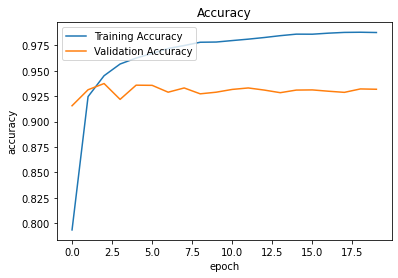

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Insert lists of accuracy obtained on the validation set
#plt.plot('acc', marker='o')
plt.plot(history_final.history['accuracy'])
plt.plot(history_final.history['val_accuracy'])
# Add extra descriptions to plot
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper left')
# Display the plot
plt.savefig('mfinalacc.png', dpi=600)
plt.show()
files.download("mfinalacc.png") 

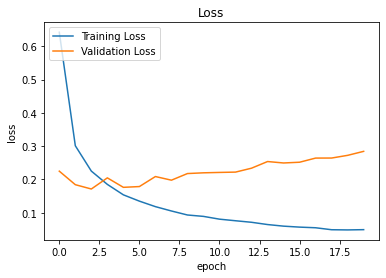

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
plt.plot(history_final.history['loss'])
plt.plot(history_final.history['val_loss'])
# Add extra descriptions to plot
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training Loss','Validation Loss'], loc='upper left')
# Display the plot
plt.savefig('mfinalloss.png', dpi=600)
plt.show()
files.download("mfinalloss.png") 

In [ ]:
loss_final, accuracy_final = model_final.evaluate(X_test, y_test, verbose=0)
print("Loss:\t{0}\nAccuracy:\t{1}".format(loss_final, accuracy_final))

Loss:	0.26783978939056396
Accuracy:	0.9326474666595459


In [ ]:
predicted = model_final.predict(X_test)
# see the predicted
print(predicted)   

[[9.9996817e-01 3.7327154e-05]
 [9.9857640e-01 1.4170003e-03]
 [9.9999380e-01 7.1264089e-06]
 ...
 [9.9975878e-01 2.7247658e-04]
 [2.8321568e-07 9.9999976e-01]
 [9.5876276e-02 9.0203488e-01]]


In [ ]:
# changing the format of y_preds and y_tests to make the assessment of the network
idx = np.argmax(predicted, axis=-1)
y_preds= np.zeros(predicted.shape )
y_preds[np.arange(predicted.shape[0]), idx] = 1

print(y_preds)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [0. 1.]
 [0. 1.]]


In [ ]:
idx = np.argmax(y_test, axis=-1)
y_tests= np.zeros(y_test.shape )
y_tests[np.arange(y_test.shape[0]), idx] = 1

print(y_tests)

[[1. 0.]
 [0. 1.]
 [1. 0.]
 ...
 [1. 0.]
 [0. 1.]
 [0. 1.]]


In [ ]:
# Create the performance report
print(classification_report(y_tests, y_preds))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      4634
           1       0.88      0.85      0.87      1587

   micro avg       0.93      0.93      0.93      6221
   macro avg       0.92      0.90      0.91      6221
weighted avg       0.93      0.93      0.93      6221
 samples avg       0.93      0.93      0.93      6221

